In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/pizza_sales.csv')
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
rows, columns = df.shape
attributes = df.columns

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")
print(f"Attributes: {attributes}")


Number of rows: 48620
Number of columns: 12
Attributes: Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [ ]:
df.isna().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [ ]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [ ]:
df['pizza_size'].value_counts()

pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

In [ ]:
df['pizza_name'].value_counts()

pizza_name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza     

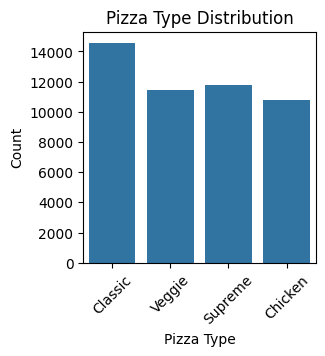

In [ ]:
plt.figure(figsize=(3, 3))
sns.countplot(data=df, x='pizza_category')
plt.title('Pizza Type Distribution')
plt.xlabel('Pizza Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

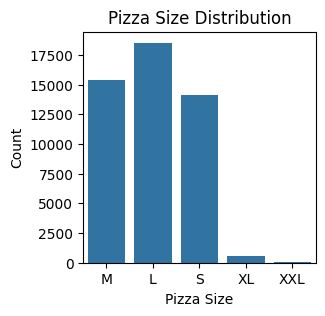

In [ ]:
plt.figure(figsize=(3, 3))
sns.countplot(data=df, x='pizza_size')
plt.title('Pizza Size Distribution')
plt.xlabel('Pizza Size')
plt.ylabel('Count')
plt.show()

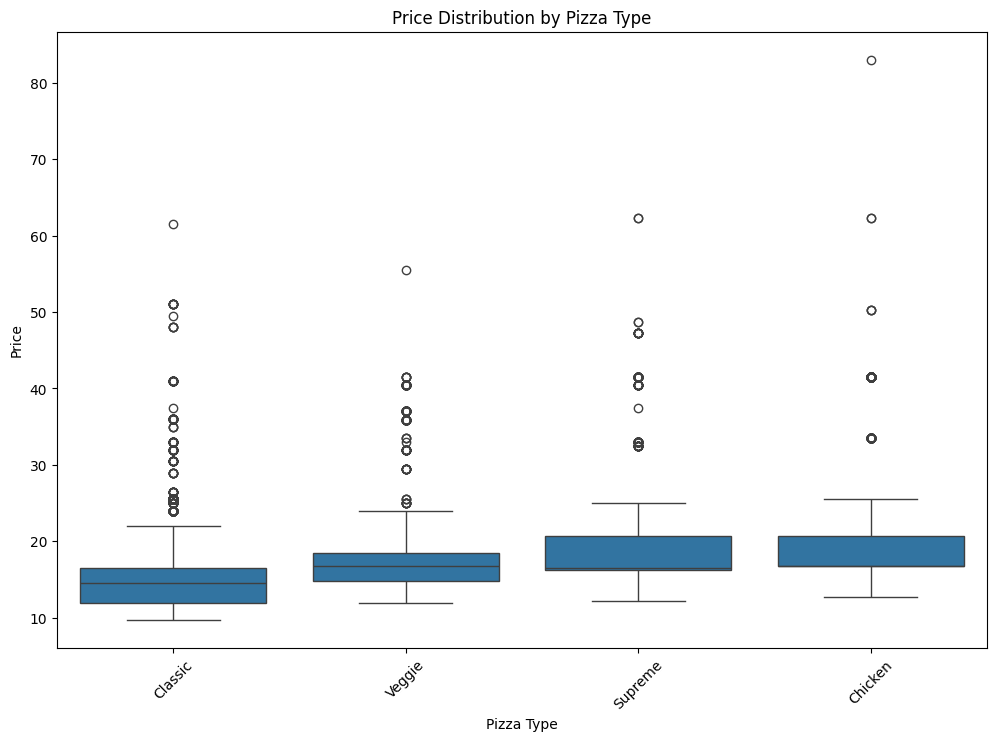

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='pizza_category', y='total_price')
plt.title('Price Distribution by Pizza Type')
plt.xlabel('Pizza Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

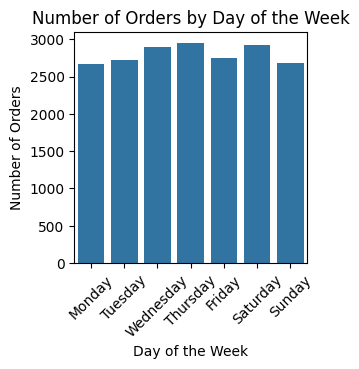

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'],errors='coerce')

# Extractday of the week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['order_date'].dt.dayofweek

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#  DataFrame to store daily order counts
daily_orders = df['day_of_week'].value_counts().sort_index().reindex(range(7), fill_value=0)

plt.figure(figsize=(3, 3))
sns.barplot(x=days_of_week, y=daily_orders.values)
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'],errors='coerce')
df['month'] = df['order_date'].dt.month
monthly_sales = df.groupby('month')['total_price'].sum()

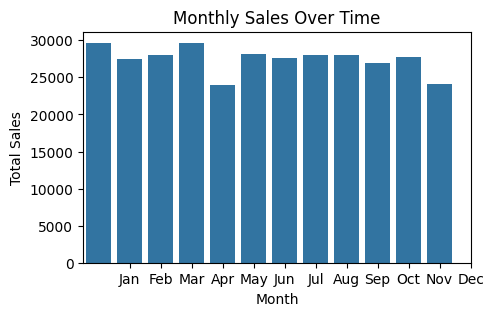

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [ ]:
favorite_pizza = df.groupby(['pizza_name', 'pizza_size'])['order_id'].count().idxmax()
print("Favorite Pizza:", favorite_pizza)

Favorite Pizza: ('The Big Meat Pizza', 'S')


**Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
le = LabelEncoder()
df['pizza_id_encoded'] = le.fit_transform(df['pizza_id'])
df['pizza_name_encoded'] = le.fit_transform(df['pizza_name'])
df['order_date_encoded'] = le.fit_transform(df['order_date'])
df['order_time_encoded'] = le.fit_transform(df['order_time'])
df['pizza_size_encoded'] = le.fit_transform(df['pizza_size'])
df['pizza_category_encoded'] = le.fit_transform(df['pizza_category'])
df['pizza_ingredients_encoded'] = le.fit_transform(df['pizza_ingredients'])

In [ ]:
X = df[['pizza_size_encoded','pizza_category_encoded', 'pizza_ingredients_encoded']]
y = df['total_price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
predicted_prices = model.predict(X)

Predicted Price: 16.831657327045967
Most Sold Pizza: The Classic Deluxe Pizza
R-squared: 0.393204246713203
Root Mean Squared Error (RMSE): 3.4847568887628606
Mean Squared Error: 12.143530573780213
Mean Absolute Error (MAE): 1.6426313470600975
Mean Absolute Error Percentage (MAPE): 9.79%
Mean Squared Error Percentage: 72.37%
R-squared: 0.393204246713203


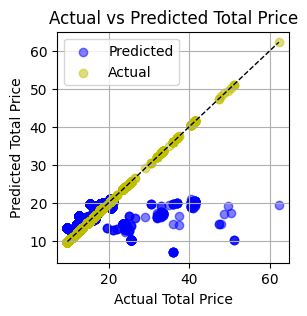

In [ ]:
most_sold_pizza = df['pizza_name'].value_counts().idxmax()
print(f"Predicted Price: {predicted_prices.mean()}")
print(f"Most Sold Pizza: {most_sold_pizza}")
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mean_actual = y_test.mean()
mse_percentage = (mse / mean_actual) * 100
mape = mean_absolute_error(y_test, y_pred) / mean_actual * 100
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error Percentage (MAPE): {mape:.2f}%")
print(f"Mean Squared Error Percentage: {mse_percentage:.2f}%")
print(f"R-squared: {r2}")
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
plt.scatter(y_test, y_pred, color='b', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='y', label='Actual', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')
plt.title('Actual vs Predicted Total Price')
plt.legend()
plt.grid(True)
plt.show()

**Decision** **Trees**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
predicted_prices = model.predict(X)


Predicted Price: 16.820613402256335
Most Sold Pizza: The Classic Deluxe Pizza
Root Mean Squared Error (RMSE): 2.470449559058465
Mean Squared Error: 6.1031210238521645
Mean Absolute Error (MAE): 0.6428497160727743
Mean Absolute Error Percentage (MAPE): 3.83%
Mean Squared Error Percentage: 36.37%
R-squared: 0.6950353197063652


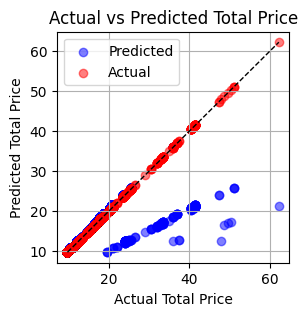

In [ ]:
most_sold_pizza = df['pizza_name'].value_counts().idxmax()
print(f"Predicted Price: {predicted_prices.mean()}")
print(f"Most Sold Pizza: {most_sold_pizza}")
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mean_actual = y_test.mean()
mse_percentage = (mse / mean_actual) * 100
mape = mean_absolute_error(y_test, y_pred) / mean_actual * 100
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error Percentage (MAPE): {mape:.2f}%")
print(f"Mean Squared Error Percentage: {mse_percentage:.2f}%")
print(f"R-squared: {r2}")
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
plt.scatter(y_test, y_pred, color='b', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='r', label='Actual', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')
plt.title('Actual vs Predicted Total Price')
plt.legend()
plt.grid(True)
plt.show()


**Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
predicted_prices = model.predict(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame containing the pizza sales data
le = LabelEncoder()
df['pizza_id_encoded'] = le.fit_transform(df['pizza_id'])


Predicted Price: 16.821224685681262
Most Sold Pizza: The Classic Deluxe Pizza
Root Mean Squared Error (RMSE): 2.470468603990518
Mean Squared Error: 6.103215123302858
Mean Absolute Error (MAE): 0.6436547903754081
Mean Absolute Error Percentage (MAPE): 3.84%
Mean Squared Error Percentage: 36.37%
R-squared: 0.6950306176844351


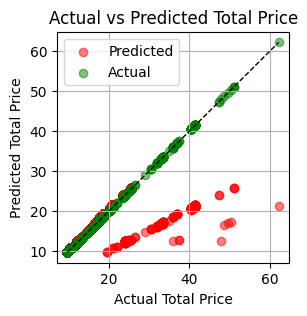

In [ ]:
most_sold_pizza = df['pizza_name'].value_counts().idxmax()
print(f"Predicted Price: {predicted_prices.mean()}")
print(f"Most Sold Pizza: {most_sold_pizza}")
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mean_actual = y_test.mean()
mse_percentage = (mse / mean_actual) * 100
mape = mean_absolute_error(y_test, y_pred) / mean_actual * 100
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error Percentage (MAPE): {mape:.2f}%")
print(f"Mean Squared Error Percentage: {mse_percentage:.2f}%")
print(f"R-squared: {r2}")
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
plt.scatter(y_test, y_pred, color='r', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='g', label='Actual', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')
plt.title('Actual vs Predicted Total Price')
plt.legend()
plt.grid(True)
plt.show()


**KNN Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = model.predict(X_test)

Predicted Price: 16.821224685681262
Most Sold Pizza: The Classic Deluxe Pizza
Root Mean Squared Error (RMSE): 2.6213152626675233
Mean Squared Error: 6.871293706293707
Mean Absolute Error (MAE): 0.56444878650761
Mean Absolute Error Percentage (MAPE): 3.36%
Mean Squared Error Percentage: 40.95%
R-squared: 0.6566507725876805


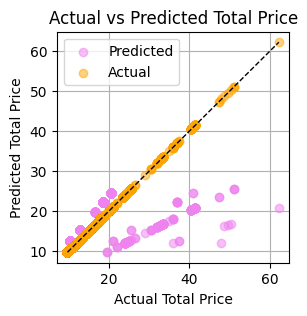

In [ ]:
most_sold_pizza = df['pizza_name'].value_counts().idxmax()
print(f"Predicted Price: {predicted_prices.mean()}")
print(f"Most Sold Pizza: {most_sold_pizza}")
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mean_actual = y_test.mean()
mse_percentage = (mse / mean_actual) * 100
mape = mean_absolute_error(y_test, y_pred) / mean_actual * 100
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error Percentage (MAPE): {mape:.2f}%")
print(f"Mean Squared Error Percentage: {mse_percentage:.2f}%")
print(f"R-squared: {r2}")
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
plt.scatter(y_test, y_pred, color='Violet', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='Orange', label='Actual', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')
plt.title('Actual vs Predicted Total Price')
plt.legend()
plt.grid(True)
plt.show()

**Neural Networks (Multi-layer Perceptron)**

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

Predicted Price: 16.821224685681262
Most Sold Pizza: The Classic Deluxe Pizza
Root Mean Squared Error (RMSE): 2.6213152626675233
Mean Squared Error: 6.871293706293707
Mean Absolute Error (MAE): 0.56444878650761
Mean Absolute Error Percentage (MAPE): 3.36%
Mean Squared Error Percentage: 40.95%
R-squared: 0.6566507725876805


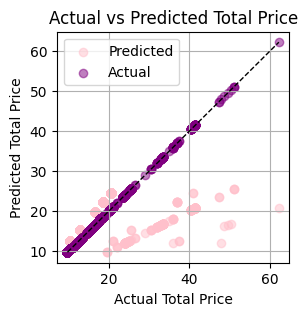

In [ ]:
most_sold_pizza = df['pizza_name'].value_counts().idxmax()
print(f"Predicted Price: {predicted_prices.mean()}")
print(f"Most Sold Pizza: {most_sold_pizza}")
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mean_actual = y_test.mean()
mse_percentage = (mse / mean_actual) * 100
mape = mean_absolute_error(y_test, y_pred) / mean_actual * 100
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error Percentage (MAPE): {mape:.2f}%")
print(f"Mean Squared Error Percentage: {mse_percentage:.2f}%")
print(f"R-squared: {r2}")
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
plt.scatter(y_test, y_pred, color='Pink', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='purple', label='Actual', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')
plt.title('Actual vs Predicted Total Price')
plt.legend()
plt.grid(True)
plt.show()


**EXTRA** **TREES**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

Mean Squared Error: 6.103121023852163
Mean Absolute Error (MAE): 0.6428497160727766
Mean Squared Error Percentage: 36.37%
R-squared: 0.6950353197063653


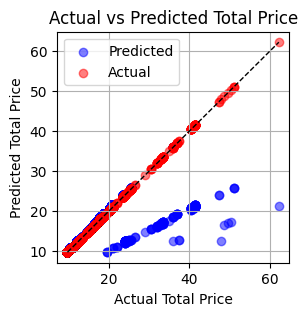

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mean_actual = y_test.mean()
mse_percentage = (mse / mean_actual) * 100
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error Percentage: {mse_percentage:.2f}%")
print(f"R-squared: {r2}")
plt.figure(figsize=(3, 3))
plt.scatter(y_test, y_pred, color='b', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='r', label='Actual', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')
plt.title('Actual vs Predicted Total Price')
plt.legend()
plt.grid(True)
plt.show()


**RidgeRegression**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Ridge(alpha=1.0, random_state=42)
model.fit(X_train, y_train)

Ridge(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

Predicted Price: 16.821224685681262
Most Sold Pizza: The Classic Deluxe Pizza
Root Mean Squared Error (RMSE): 3.4847580042757946
Mean Squared Error: 12.143538348364219
Mean Absolute Error (MAE): 1.642680742325806
Mean Absolute Error Percentage (MAPE): 9.79%
Mean Squared Error Percentage: 72.37%
R-squared: 0.39320385822778436


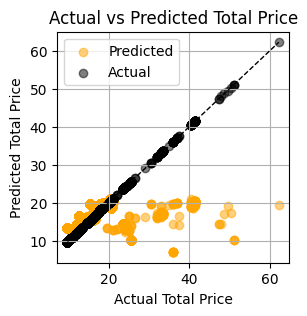

In [ ]:
most_sold_pizza = df['pizza_name'].value_counts().idxmax()
print(f"Predicted Price: {predicted_prices.mean()}")
print(f"Most Sold Pizza: {most_sold_pizza}")
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mean_actual = y_test.mean()
mse_percentage = (mse / mean_actual) * 100
mape = mean_absolute_error(y_test, y_pred) / mean_actual * 100
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error Percentage (MAPE): {mape:.2f}%")
print(f"Mean Squared Error Percentage: {mse_percentage:.2f}%")
print(f"R-squared: {r2}")
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
plt.scatter(y_test, y_pred, color='orange', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='black', label='Actual', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')
plt.title('Actual vs Predicted Total Price')
plt.legend()
plt.grid(True)
plt.show()


**XG BOOST**

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = model.predict(X_test)

Predicted Price: 16.821224685681262
Most Sold Pizza: The Classic Deluxe Pizza
Root Mean Squared Error (RMSE): 2.470449602064461
Mean Squared Error: 6.103121236340452
Mean Absolute Error (MAE): 0.642859825309242
Mean Absolute Error Percentage (MAPE): 3.83%
Mean Squared Error Percentage: 36.37%
R-squared: 0.6950353090886137


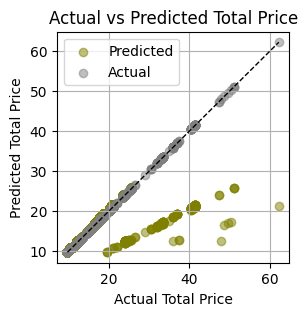

In [ ]:
most_sold_pizza = df['pizza_name'].value_counts().idxmax()
print(f"Predicted Price: {predicted_prices.mean()}")
print(f"Most Sold Pizza: {most_sold_pizza}")
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mean_actual = y_test.mean()
mse_percentage = (mse / mean_actual) * 100
mape = mean_absolute_error(y_test, y_pred) / mean_actual * 100
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error Percentage (MAPE): {mape:.2f}%")
print(f"Mean Squared Error Percentage: {mse_percentage:.2f}%")
print(f"R-squared: {r2}")
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
plt.scatter(y_test, y_pred, color='olive', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='grey', label='Actual', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')
plt.title('Actual vs Predicted Total Price')
plt.legend()
plt.grid(True)
plt.show()

**GBM**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
predicted_prices = model.predict(X)

Predicted Price: 16.820885209590532
Most Sold Pizza: The Classic Deluxe Pizza
Root Mean Squared Error (RMSE): 2.477115675175129
Mean Squared Error: 6.136102068198335
Mean Absolute Error (MAE): 0.6734706297442018
Mean Absolute Error Percentage (MAPE): 4.01%
Mean Squared Error Percentage: 36.57%
R-squared: 0.6933873016504442


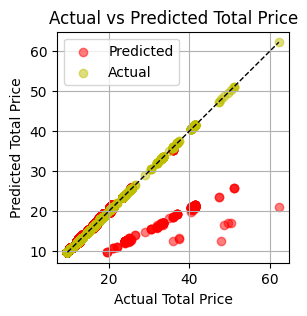

In [ ]:
most_sold_pizza = df['pizza_name'].value_counts().idxmax()
print(f"Predicted Price: {predicted_prices.mean()}")
print(f"Most Sold Pizza: {most_sold_pizza}")
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mean_actual = y_test.mean()
mse_percentage = (mse / mean_actual) * 100
mape = mean_absolute_error(y_test, y_pred) / mean_actual * 100
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error Percentage (MAPE): {mape:.2f}%")
print(f"Mean Squared Error Percentage: {mse_percentage:.2f}%")
print(f"R-squared: {r2}")
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
plt.scatter(y_test, y_pred, color='r', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='y', label='Actual', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')
plt.title('Actual vs Predicted Total Price')
plt.legend()
plt.grid(True)
plt.show()
